In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fit_func(vs):
    # paraboloid with minimum of 0 at (c, d) 
    #c, d = -2, 9
    #z = (vs[0] - c)**2 + (vs[1] - d)**2 
    
    # unmodal function with minimum of -1 at (pi,pi)
    #z = -np.cos(vs[0]) * np.cos(vs[1]) * np.exp(-((vs[0] - np.pi)**2 + (vs[1] - np.pi)**2))
    
    # ackley function with mininimum of 0 at (0, 0)
    z = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (vs[0]**2 + vs[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * vs[0]) + np.cos(2 * np.pi * vs[1]))) + np.e + 20
    return z

In [34]:
# implemented from pseudocode in "Metaheurestics" book 

#### Fitness function parameters
dims = 2
lims = [(-5, 5, dim) for dim in range(dims)]

#### Algorithm parameters 
n_particles = 10 # Number of agents
w = 0.72 # Inertia weight 
c1 = 1.2 # Cognitive coefficient
c2 = 1.2 # Social coefficient
v_max = 1 # maximum velocity 
iterations = 10

#### initialization 
#current position of particles - randomly drawn from uniform distribution in the allowed range for variable
current_pos = np.zeros(shape = (n_particles, dims))
for lim_low, lim_up, dim in lims: 
    current_pos[:,dim] = np.random.uniform(lim_low, lim_up, n_particles) 

#current velocity of particle
velocity = np.zeros(shape = (n_particles, dims)) 
for lim_low, lim_up, dim in lims: 
    velocity[:,dim] = np.random.uniform(lim_low, lim_up, n_particles) 

#Best position observed by particle
best_pos = np.copy(current_pos) 

#index of overall best particle position 
index_best_overall = np.argmax([fit_func(x) for x in current_pos]) 

# data for visualization
best_points = []

### interation loop
for it in range(iterations): 
    # Movement - calculating new position 
    velocity = w * velocity + c1 * (best_pos - current_pos) \
                            + c2 * (best_pos[index_best_overall] - current_pos)
 
    velocity[velocity > v_max] = v_max 
    velocity[velocity < -v_max] = -v_max
    
    current_pos = current_pos + velocity
 
    #Confinement - Keeping the particles within allowed bounds 
    for lim_low, lim_up, dim in lims: 
        pos_column = current_pos[:, dim] 
        vel_column = velocity[:, dim] 
        
        index_where_larger = pos_column > lim_up 
        index_where_smaller = pos_column < lim_low
        
        # Positions where outside bounds set to either upper lim or lower lim of bound. Velocity set to zero
        pos_column[index_where_larger] = lim_up
        pos_column[index_where_smaller] = lim_low
        vel_column[index_where_smaller + index_where_larger] = 0

    #Memorization - remember the best positions of each particle. NOTICE: this is for minizization
    for i in range(n_particles): 
        if fit_func(current_pos[i]) < fit_func(best_pos[i]):
            #np.copy?
            best_pos[i] = current_pos[i]
        # Remember the overall best position
        if fit_func(best_pos[i]) < fit_func(best_pos[index_best_overall]):
            index_best_overall = i
     
    best_points.append(best_pos[index_best_overall]) # data for visualization
    
print("The best position: ", best_pos[index_best_overall])
print("Value at best position: ", fit_func(best_pos[index_best_overall]))

The best position:  [ 0.00017326 -0.02535156]
Value at best position:  0.08873099052970801


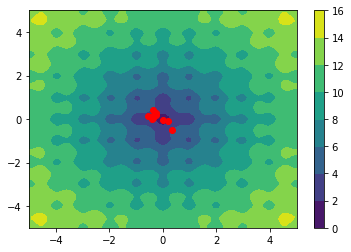

In [36]:
back_x = np.linspace(-5, 5, 100)
back_y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(back_x, back_y)
Z = fit_func([X, Y])

plt.contourf(X, Y, Z, cmap='viridis');
plt.colorbar();

x = [point[0] for point in current_pos]
y = [point[1] for point in current_pos]
plt.scatter(x, y, color = "Red")
plt.show()

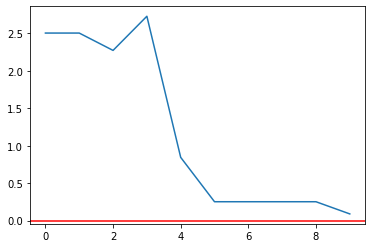

In [35]:
# fitness for best points
fitness_vals = [fit_func(x) for x in best_points]
plt.plot(fitness_vals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()